In [1]:
%pylab inline
from random import sample

Populating the interactive namespace from numpy and matplotlib


# Simulation of a recorded dynamic retrieval

In [2]:
v1 = np.load('dynamics/dynamic_1.npy')
v2 = np.load('dynamics/dynamic_2.npy')
pfc = np.load('dynamics/pfc.npy')

In [19]:
start_time = 100
end_time = 300
n_cells = 15
random.seed(1)

v1_s = v1[start_time:end_time]
pfc_s = pfc[start_time:end_time]
idx = sample(range(v1.shape[1]),n_cells)
v1_s = v1_s.T[idx]
pfc_s = pfc.T[idx]


In [20]:
sampling_rate = 25
noise_firing_rate = 0.2
n_cells = v1_s.shape[0]
times = arange(0,v1_s.shape[1])
spikes = []
for i in range(n_cells):
    inst_rate = v1_s[i] + noise_firing_rate
    spikes_loc = np.random.poisson(inst_rate/sampling_rate)
    sp = np.argwhere(spikes_loc)
    t_sp = times[sp].flatten()
    spikes.append(t_sp)
spikes = [asarray(s)/2 for s in spikes]


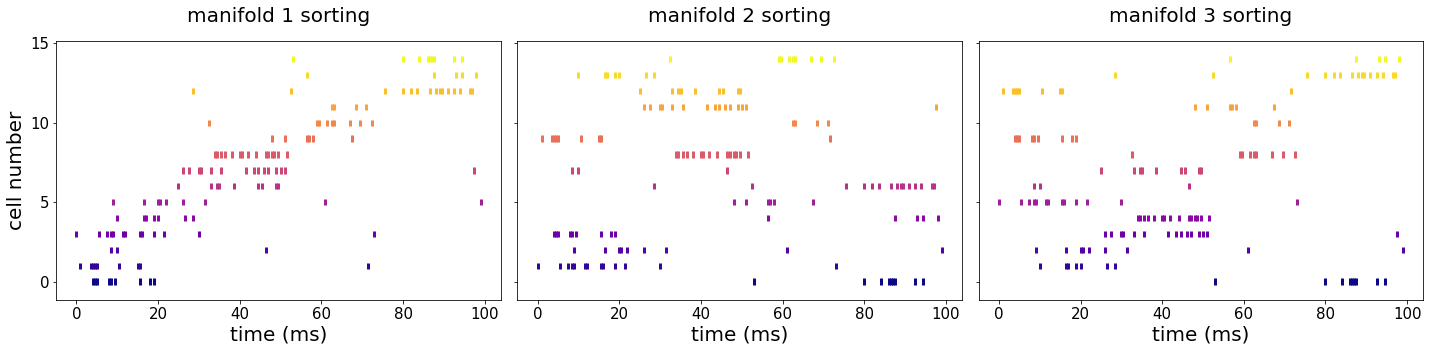

In [21]:
fig,ax = subplots(1,3,figsize = (20,5),sharey=True)

color_map = cm.get_cmap('plasma', n_cells).colors

spikes1 = [spikes[i] for i in argsort(pfc_s.T[0])]
ax[0].eventplot(spikes1,color=color_map, linelengths = 0.4,linewidths=3);     
#ax[0].set_xlim(25,205)
ax[0].set_title("manifold 1 sorting",fontsize=20,y=1.05)
ax[0].set_ylabel("cell number",fontsize=20)
ax[0].set_xlabel("time (ms)",fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=15)
#ax2 =subplot(1,3,2)
spikes2 = [spikes[i] for i in argsort(pfc_s.T[1])]
ax[1].eventplot(spikes2,color=color_map, linelengths = 0.4,linewidths=3);  
#ax[1].set_xlim(25,205)
ax[1].set_title("manifold 2 sorting",fontsize=20,y=1.05)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[1].set_xlabel("time (ms)",fontsize=20)
#ax3 = subplot(1,3,3)
spikes3 = [spikes[i] for i in argsort(pfc_s.T[2])]
ax[2].eventplot(spikes3,color=color_map, linelengths = 0.4,linewidths=3); 
#ax[2].set_xlim(25,105)
ax[2].set_title("manifold 3 sorting",fontsize=20,y=1.05)
ax[2].set_yticks([0,5,10,15])
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[2].set_xlabel("time (ms)",fontsize=20)

tight_layout()
plt.savefig("replay_example2.svg",dpi=1000)